In [3]:
## Importing Important Libraries

import numpy as np, pandas as pd, seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix )

## Step 1 : Loading the DataSet

In [4]:
data =  pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


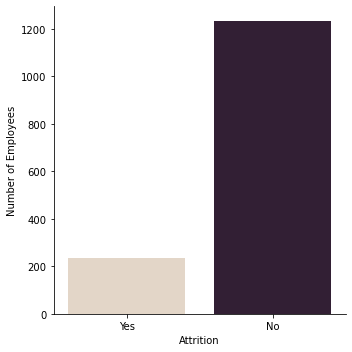

In [8]:
#Checking the number of 'Yes' and 'No' in 'Attrition'

ax = sns.catplot(x="Attrition", kind="count", palette="ch:.20", data=data);
ax.set(xlabel = 'Attrition', ylabel = 'Number of Employees')
plt.show()

Checking if any missing values in the data

In [11]:
#Identifying columns with missing information

missing_col = data.columns[data.isnull().any()].values
print('The missing columns in the dataset are: ',missing_col)

The missing columns in the dataset are:  []


In [14]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Step 2 : Feature Engineering

In [16]:
## Getting the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
#Extracting the Numeric and Categorical features

df_num = pd.DataFrame(data = data.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data = data.select_dtypes(include = ['object']))
print("Shape of Numeric: ",df_num.shape)
print("Shape of Categorical: ",df_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


### Creating Dummy Variables

Let us create Dummy variables for our categorical variables except our dependent variable 'Attrition'

In [19]:
## Let us first drop 'Attrition' variable

df_cat = df_cat.drop(['Attrition'], axis=1)
df_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [20]:
data_dummies = pd.get_dummies(df_cat)
data_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


### Scaling Numeric Features

In [21]:
## Let us StandardScaler to scale the data

standard_scaler = StandardScaler()
df_num_scaled = standard_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(data = df_num_scaled, columns=df_num.columns, index = df_num.index) 

In [22]:
df_num_scaled.shape

(1470, 26)

In [23]:
df_num_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [24]:
## Merging the datasets

df_transformed_final = pd.concat([df_num_scaled, data_dummies], axis=1)
df_transformed_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,1,0,0,0,1,1,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,1,0,0,0,1,0,1,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,0,0,0,0,0,0,1,1,0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,1,0,0,0,1,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,0,0,0,0,0,1,0,1,1,0


In [25]:
target = data.Attrition

## Mapping the data - 'Yes' to 1 and 'No' to 0
map = {'Yes' : 1, 'No' : 0}
target = target.apply(lambda x : map[x])

target.shape

(1470,)

In [27]:
## Assigning the X and y 

X = df_transformed_final
y = target

In [29]:
X.shape

(1470, 55)

In [30]:
y.shape

(1470,)

## Step 3 : Model Building

### Adaboost Classifier

#### The most important parameters are base_estimator, n_estimators and learning_rate.
* base_estimator - It is the learning algorithm to use to train the weak models. The default Learning Algorithm is DecisionTreeClassifier with Max Depth of 1
* n_estimators - It is the number of models to iteratively train.
* learning_rate - It is the contribution of each model to the weights and default value for it is 1. There is a trade-off between learning_rate and n_estimators. Reducing the learning rate will forcing the model train slower (but sometimes resulting in better performance scores). Decreasing the learning rate L makes the coefficients α_m smaller, which reduces the amplitude of the sample_weights at each step (As per weight formula we use at each step for updating weights).

### Train - Test Split

In [31]:
## Splitting into Train and test dataset in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 40, stratify=y)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1176, 55)
X_test shape (294, 55)
y_train shape (1176,)
y_test shape (294,)


In [32]:
## Using AdaBoosting to predict 

adaBoost = AdaBoostClassifier(n_estimators=200, random_state=40)
adaBoost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=40)

In [33]:
y_pred = adaBoost.predict(X_test)

In [34]:
## Accuracy of the model

accuracy_score(y_test, y_pred)

0.8469387755102041

In [35]:
## Confusion Matrix for our model

confusion_matrix(y_test, y_pred)

array([[235,  12],
       [ 33,  14]], dtype=int64)